<a href="https://colab.research.google.com/github/saponew/James-Bond/blob/main/gb_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install bayesian-optimization

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from pathlib import Path
csvpath = Path('/content/drive/MyDrive/Project 2/Data/Data tables/xgboost_model_df.csv')

df = pd.read_csv(csvpath, parse_dates=True, index_col='date_fundamentals')

In [ ]:
df.dtypes

siccode_fundamentals                            int64
maturity_year                                 float64
revenueusd                                    float64
ebitdausd                                     float64
ebitdamargin                                  float64
netinccmnusd                                  float64
netmargin                                     float64
cashnequsd                                    float64
workingcapital                                float64
debtusd                                       float64
liabilities                                   float64
equityusd                                     float64
marketcap                                     float64
ev                                            float64
fcf                                           float64
ncfdebt                                       float64
currentratio                                  float64
de                                            float64
divyield                    

In [ ]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [ ]:
X = df.copy()
X = X.drop(columns='rank_shifted')
X.head()

,siccode_fundamentals,maturity_year,revenueusd,ebitdausd,ebitdamargin,netinccmnusd,netmargin,cashnequsd,workingcapital,debtusd,liabilities,equityusd,marketcap,ev,fcf,ncfdebt,currentratio,de,divyield,epsusd,payoutratio,evebitda,pb,pe,close_edi,coupon_x,percent_fred_macro_yc_30_yr,percent_fred_macro_yc_3_mo,percentchange_fred_macro_gdp,dollars_fred_crude_oil_prices,percent_fred_five_year_breakeven_inflation,index_fred_macro_vix
date_fundamentals,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-06-27,7372,2.600,1.124449e+09,3.883770e+08,0.345,223876016.0,0.199,951238080.0,2.525163e+09,1.510094e+09,3.266186e+09,6.099646e+09,1.544626e+10,1.600512e+10,387451008.0,-2290000.0,3.027,0.535,0.000,0.45,0.000,11.385,2.532,19.856001,105.124,3.250,2.71,0.10,2.9,79.34,1.68,20.38
2012-06-27,7372,7.603,1.124449e+09,3.883770e+08,0.345,223876016.0,0.199,951238080.0,2.525163e+09,1.510094e+09,3.266186e+09,6.099646e+09,1.544626e+10,1.600512e+10,387451008.0,-2290000.0,3.027,0.535,0.000,0.45,0.000,11.385,2.532,19.856001,111.915,4.750,2.71,0.10,2.9,79.34,1.68,20.38
2012-07-05,2771,9.414,3.931060e+08,2.626500e+07,0.067,7250000.5,0.018,60180000.0,2.500000e+08,2.251810e+08,8.090370e+08,6.794340e+08,4.851067e+08,6.501076e+08,33485000.0,0.0,1.842,1.191,0.052,0.20,0.750,4.348,0.714,15.229000,105.250,7.375,2.74,0.09,2.9,87.74,1.80,16.66
2012-07-19,5500,5.742,3.904500e+09,1.833000e+08,0.047,78600000.0,0.020,62100000.0,1.686000e+08,2.028500e+09,4.933200e+09,1.528200e+09,4.922053e+09,6.888453e+09,-13500000.0,144500000.0,1.062,3.228,0.000,0.65,0.000,10.145,3.221,16.874001,110.152,6.750,2.59,0.09,2.9,89.07,1.82,16.16
2012-07-19,4011,14.792,3.012000e+09,1.211000e+09,0.402,512000000.0,0.170,642000000.0,-2.030000e+08,9.089000e+09,2.069400e+10,8.895000e+09,2.369094e+10,3.213794e+10,93000000.0,-42000000.0,0.921,2.326,0.022,0.49,0.286,7.062,2.663,12.588000,127.500,7.250,2.59,0.09,2.9,89.07,1.82,16.16


In [ ]:
# Define target vector
y = df["rank_shifted"].values.reshape(-1, 1)
y[:5]

array([[ 8.],
       [ 8.],
       [12.],
       [12.],
       [ 9.]])

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier = GradientBoostingClassifier(n_estimators=21,
                                            learning_rate=learning_rate,
                                            max_features=10,
                                            max_depth=3,
                                            random_state=0)

    # Fit the model
    classifier.fit(X_train_scaled, y_train.ravel())
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier.score(
            X_train_scaled,
            y_train.ravel())))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier.score(
            X_test_scaled,
            y_test.ravel())))
    print()

Learning rate:  0.05
Accuracy score (training): 0.761
Accuracy score (validation): 0.749

Learning rate:  0.1
Accuracy score (training): 0.830
Accuracy score (validation): 0.799

Learning rate:  0.25
Accuracy score (training): 0.901
Accuracy score (validation): 0.861

Learning rate:  0.5
Accuracy score (training): 0.019
Accuracy score (validation): 0.020

Learning rate:  0.75
Accuracy score (training): 0.020
Accuracy score (validation): 0.022

Learning rate:  1
Accuracy score (training): 0.013
Accuracy score (validation): 0.009



In [ ]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=21,
                                        learning_rate=0.25,
                                        max_features=8,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(20)

,Prediction,Actual
0,10.0,10.0
1,9.0,9.0
2,6.0,6.0
3,7.0,7.0
4,9.0,9.0
5,8.0,8.0
6,16.0,16.0
7,18.0,19.0
8,6.0,6.0
9,7.0,7.0


In [ ]:
 # Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.8625185185185186


column = ['rank']
y_test = pd.DataFrame(y_test)
y_test.columns = column 
y_test['rank'].unique()

array([10.,  9.,  6.,  7.,  8., 16., 19.,  4., 13., 12.,  5.,  3., 20.,
       11., 18., 14., 15., 17., 21.])

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 3", "Actual 4", "Actual 5",
               "Actual 6", "Actual 7", "Actual 8", "Actual 9", "Actual 10",
               "Actual 11", "Actual 12", "Actual 13", "Actual 14", "Actual 15",
               "Actual 16", "Actual 17", "Actual 18", "Actual 19", "Actual 20"
               , "Actual 21"],
    columns=["Predicted 3","Predicted 4","Predicted 5", 
             "Predicted 6","Predicted 7","Predicted 8","Predicted 9","Predicted 10",
             "Predicted 11","Predicted 12","Predicted 13","Predicted 14","Predicted 15", 
             "Predicted 16","Predicted 17","Predicted 18","Predicted 19","Predicted 20", 
             "Predicted 21"]
)

# Displaying results
display(cm_df)

,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,Predicted 10,Predicted 11,Predicted 12,Predicted 13,Predicted 14,Predicted 15,Predicted 16,Predicted 17,Predicted 18,Predicted 19,Predicted 20,Predicted 21
Actual 3,19,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Actual 4,0,226,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Actual 5,0,4,118,8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Actual 6,0,0,2,319,10,1,6,2,0,0,0,0,0,0,0,0,0,0,0
Actual 7,0,2,1,24,314,9,21,1,0,2,0,1,0,0,0,2,0,0,0
Actual 8,0,1,0,7,16,490,50,12,5,2,0,0,0,0,1,0,0,0,0
Actual 9,0,0,0,6,3,14,618,20,1,1,4,1,0,0,0,0,0,4,0
Actual 10,0,0,0,13,2,7,25,338,1,2,0,4,0,0,1,0,0,0,0
Actual 11,0,0,0,0,0,1,1,10,123,5,0,0,0,0,0,0,0,0,0
Actual 12,0,0,0,0,0,7,0,9,1,89,0,2,0,1,1,0,0,0,1


In [ ]:
 # Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

         3.0       1.00      0.83      0.90        23
         4.0       0.97      0.97      0.97       233
         5.0       0.94      0.89      0.91       132
         6.0       0.84      0.94      0.88       340
         7.0       0.90      0.83      0.87       377
         8.0       0.92      0.84      0.88       584
         9.0       0.85      0.92      0.88       672
        10.0       0.84      0.86      0.85       393
        11.0       0.92      0.88      0.90       140
        12.0       0.82      0.80      0.81       111
        13.0       0.86      0.81      0.83        84
        14.0       0.62      0.65      0.64        55
        15.0       0.52      0.47      0.49        30
        16.0       0.73      0.66      0.69       105
        17.0       0.52      0.59      0.55        27
        18.0       0.80      0.85      0.82        55
        19.0       0.67      0.33      0.44         6
     

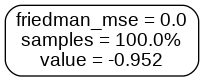

In [ ]:
# Graph tree
dot_data = tree.export_graphviz(
    classifier.estimators_[19, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

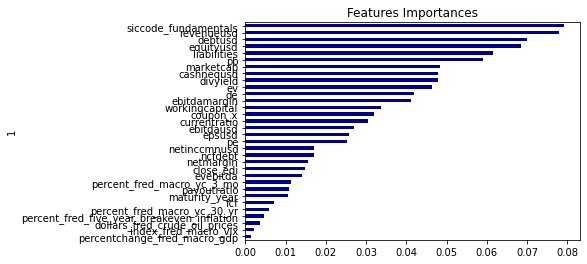

In [ ]:
importances = classifier.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(classifier.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(classifier.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='darkblue', title= 'Features Importances', legend=False)